In [1]:
import numpy as np
import random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## 5 Create data

In [2]:
classA = np.concatenate ((np.random.randn(10,2) * 0.2 + [1.5, 0.5 ] ,np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]
inputs = np.concatenate((classA, classB))
targets = np.concatenate (
(np.ones(classA.shape[0]),-np.ones(classB.shape[0])))
N = inputs.shape [0] # Number of rows ( samples )
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]

In [3]:
def P_ij(inputs,targets,func,param):
    inputs_ij = np.array([func(i,j,param) for i in inputs for j in inputs])
    targets_ij = np.dot(targets[:,None],targets[None,:])
    targets_ij = np.asarray(targets_ij).reshape(-1)
    P = inputs_ij*targets_ij
    return P

## implement necessary functions

In [4]:
#linear kernel
def lin_kernel(x,y,any=0):
    erg = np.dot(x,y)
    return erg

#polynomial kernel
def pol_kernel(x,y,p):
    erg = (np.dot(x,y)+1)**p
    return erg

#RBF kernel
def RBF_kernel(x,y,sigma):
    exp = (np.linalg.norm(x-y,2)**2)/(2*sigma**2)
    erg = np.exp(-exp)
    return erg

In [13]:
def calc_b(alpha,targets,s_ind,inputs,func,sigma):
    erg = []
    for i in range(len(inputs)):
        temp = alpha[i]*func(inputs[i],inputs[s_ind],sigma)*targets[i]
        erg.append(temp)
    return sum(erg)-targets[s_ind]


def ind(s,inputs,alpha,targets,b,func,sigma):
    erg = []
    for i in range(len(inputs)):
        temp = func(inputs[i],s,sigma)*targets[i]*alpha[i]
        erg.append(temp)
    return sum(erg)-b


In [5]:
def objective(alpha):
    alpha_ij = np.array([i*j for i in alpha for j in alpha])
    temp = np.array([i*j for i,j in zip(alpha_ij,PA)])
    erg = 0.5*sum(temp) - np.sum(alpha) #PT should be already an array to optimize runtime
    return erg

def z_const(alpha):
    erg = np.dot(alpha,t)
    return erg

In [6]:
#do optimization
C = None
sigma = 1
PA = P_ij(inputs,targets,lin_kernel,0)
t = targets
B = [(0, None) for b in range(N)]

ret = minimize(objective,np.zeros(40),bounds=B,constraints={'type':'eq','fun':z_const})
ret['x']

array([1.53829938e-14, 1.17341083e-14, 7.88914374e-15, 4.69825507e-15,
       6.64090449e-15, 9.06243722e+00, 4.94880215e-15, 1.24064013e-14,
       4.23623325e-15, 1.04919838e-14, 5.60735881e-15, 7.30237389e-15,
       2.05087400e-13, 2.29052620e+01, 1.50269366e-14, 3.89292558e-14,
       1.01701616e-14, 6.98540206e-15, 2.02748143e-15, 2.37148268e-14,
       1.87085673e-14, 7.86745635e-16, 4.99640827e-16, 2.05026731e-15,
       2.44077802e-15, 0.00000000e+00, 1.79262756e-14, 5.04433431e-14,
       1.38428248e+01, 3.56565548e-14, 2.91323845e-15, 0.00000000e+00,
       1.95024555e-15, 5.57505152e-15, 0.00000000e+00, 7.23401020e-15,
       2.28945254e-15, 0.00000000e+00, 4.70682509e-15, 9.14108223e-15])

In [10]:
alpha = []
for i in ret['x']:
    if i < 10**-5:
        alpha.append(0)
    else:
        alpha.append(i)
alpha = np.array(out)
alpha

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        9.06243722,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 22.90526205,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 13.84282483,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [14]:
b = calc_b(alpha,targets,5,inputs,lin_kernel,0)


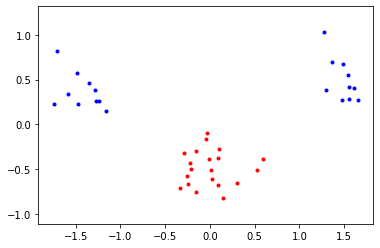

In [17]:
plt.plot([p[0] for p in classA],[p[1] for p in classA],'b.')
plt.plot([p[0] for p in classB],[p[1] for p in classB],'r.')
plt.axis('equal') # Force same s c a l e on both axes
plt.savefig('svmplot.pdf') # Save a copy 


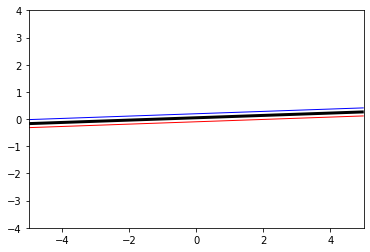

In [20]:
xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)
grid = np.array([[ind(np.array([x,y]),inputs,alpha,targets,b,lin_kernel,0) for x in xgrid] for y in ygrid])

plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))